
# Pattern Recognition
----
`Roll: CS20B1016, Name: V Nagasai`

----
## Assignment-1
----


In [35]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Calculate the distance between the two normalized histograms H1 and H2 using each of the following methods:
	- KL Distance
	- Bhattacharyya Distance
$$H1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]$$
$$H2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]$$

In [36]:
h1 = [0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]
h2 = [0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]

#KL Distance
KL = 0
for i in range(len(h1)):
	KL += h1[i]*math.log(h1[i]/h2[i], 10)
print(f"KL distance between above normalized histograms is: {KL}")

#Bhattacharyya Distance
BC = 0
for i in range(len(h1)):
	BC += math.sqrt(h1[i]*h2[i])
BD = -math.log(BC, 2.718)
print(f"Battacharrya Distance between above normalized histograms is: {BD}")

KL distance between above normalized histograms is: 0.027319366943718365
Battacharrya Distance between above normalized histograms is: 0.014831593909631874


2. Given $(hq − ht)^T = (0.5 0.5 -0.5 -0.25 -0.25)$ and
 
	$$A = \begin{pmatrix}1&0.135&0.195&0.137&0.157\\0.135&1&0.2&0.309&0.143\\0.195&0.2&1&0.157&0.122\\0.137&0.309&0.157&1&0.195\\0.157&0.143&0.122&0.195&1\end{pmatrix}$$

Find the quadratic form distance.


In [37]:
S = np.array([0.5, 0.5, -0.5, -0.25, -0.25])
A = np.array([[1, 0.135, 0.195, 0.137, 0.157], [0.135, 1, 0.2, 0.309, 0.143], [0.195, 0.2, 1, 0.157, 0.122], [0.137, 0.309, 0.157, 1, 0.195], [0.157, 0.143, 0.122, 0.195, 1]])

quad_distance = math.sqrt(S.T@A@S)
print(f"Quadratic form distance is: {quad_distance}")

Quadratic form distance is: 0.8078520904224981


3. Compare two text files doc1.txt and doc2.txt using cosine distance.

	**<u>doc1.txt</u>**

	MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are
	vectors and matrices, so you must be familiar with these before making extensive use of this program.

	**<u>doc2.txt</u>**

	MATLAB works with essentially one kind of object, a rectangular numerical matrix. Here is some basic
	information on using MATLAB matrix commands.

In [46]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

doc1 = "MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are vectors and matrices, so you must be familiar with these before making extensive use of this program"
doc2 = "MATLAB works with essentially one kind of object, a rectangular numerical matrix. Here is some basic information on using MATLAB matrix commands"

doc1_words = word_tokenize(doc1)
doc2_words = word_tokenize(doc2)

stop_words = stopwords.words("english")

doc1_set = {word for word in doc1_words if not word in stop_words}
doc2_set = {word for word in doc2_words if not word in stop_words}


union = doc1_set.union(doc2_set)

x, y = [], []

for word in union:
	if word in doc1_set:
		x.append(1)
	else:
		x.append(0)
	if word in doc2_set:
		y.append(1)
	else:
		y.append(0)

cosine = 0
for i in range(len(union)):
	cosine += x[i]*y[i]

cosine /= float(sum(x)*sum(y)**0.5)
print(f"Cosine distance between two given docs: {cosine}")

Cosine distance between two given docs: 0.05555555555555555


4. Classify flower 1, 51, and 101 from the Iris Dataset (.csv file) attached along with the assignment document
	into one of the three classes as given in dataset specification:

	**<u>Dataset Specifications:</u>**

	Total number of samples = 150
	Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)
	The number of samples in each class = 50

	**<u>Directions to classify:</u>**
   1. Use features PetalLengthCm and PetalWidthCm only for classification.
   2. Consider flowers 1,51 and 101 as test cases.
   3. Plot the distribution of rest 147 sample points along with their classes( differentiate classes with different
   colour). Consider PetalWidthCm along Y-axis and PetalLengthCm along X-axis.
   4. Capture the properties of the distribution and use suitable distance metrics to classify the flowers 1,51 and
   101 into one of the classes.
   5. Print their class and plot the points on the previous plot with a marker differentiating the three points.

In [38]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
test1 = np.array(df.iloc[1,3:5])
test2 = np.array(df.iloc[51,3:5])
test3 = np.array(df.iloc[101,3:5])
df.drop([1,51,101],axis=0,inplace=True)

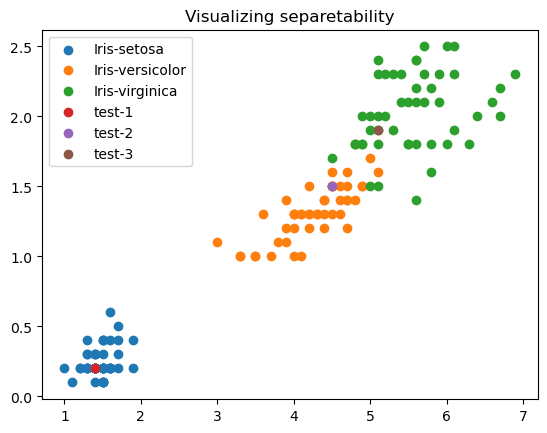

In [40]:
C1 = df[df["Species"] == "Iris-setosa"]
C2 = df[df["Species"] == "Iris-versicolor"]
C3 = df[df["Species"] == "Iris-virginica"]
C1_PL = C1["PetalLengthCm"]
C2_PL = C2["PetalLengthCm"]
C3_PL = C3["PetalLengthCm"]
C1_PW = C1["PetalWidthCm"]
C2_PW = C2["PetalWidthCm"]
C3_PW = C3["PetalWidthCm"]

#Plotting features petal length and petal width of three classes to visualize separetability
plt.scatter(C1_PL, C1_PW,label="Iris-setosa")
plt.scatter(C2_PL, C2_PW, label="Iris-versicolor")
plt.scatter(C3_PL, C3_PW, label="Iris-virginica")

#Plotting the test set 
plt.scatter(test1[0], test1[1], label="test-1")
plt.scatter(test2[0], test2[1], label="test-2")
plt.scatter(test3[0], test3[1], label="test-3")

plt.title("Visualizing separetability")
plt.legend()
plt.show()

In [41]:
def quad_form_distance(test:np.ndarray, f1, f2):
	distances = []
	for (i, j) in zip(f1, f2):
		C = np.cov(i, j)
		M = np.array([np.mean(i), np.mean(j)])
		dist = math.sqrt((M-test).T@C@(M-test))
		distances.append(dist)
	return distances

tests = [test1, test2, test3]
f1 = [C1_PL, C2_PL, C3_PL]
f2 = [C1_PW, C2_PW, C3_PW]

classes = {
	1: "Iris-setosa",
	2: "Iris-versicolor",
	3: "Iris-virginica"
}

for index, test in enumerate(tests):
	distances = quad_form_distance(test, f1, f2)
	c, d = distances.index(min(distances)) + 1, min(distances)
	print(f"Test-{index+1} belongs to class {c} which is {classes[c]} and its distance is {d}")


Test-1 belongs to class 1 which is Iris-setosa and its distance is 0.013712457443766089
Test-2 belongs to class 2 which is Iris-versicolor and its distance is 0.1452466375259193
Test-3 belongs to class 3 which is Iris-virginica and its distance is 0.2688035005424128


5. Consider the following images. Obtain the histograms for each of the images. Using a suitable distance measure, find the distance between the query image and reference images.

![Query](queryimage.png)
![Reference1](refimage1.png)
![Reference2](refimage2.png)

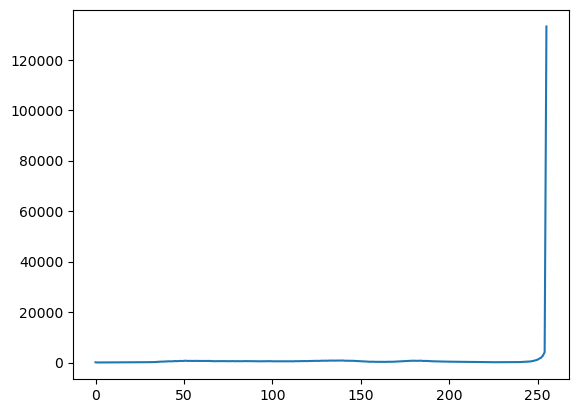

In [42]:
import cv2


query = cv2.imread("queryimage.png")
query = query.flatten()
hist_of_query = cv2.calcHist([query],[0],None,[256],[0,256])
plt.plot(hist_of_query)
plt.show()

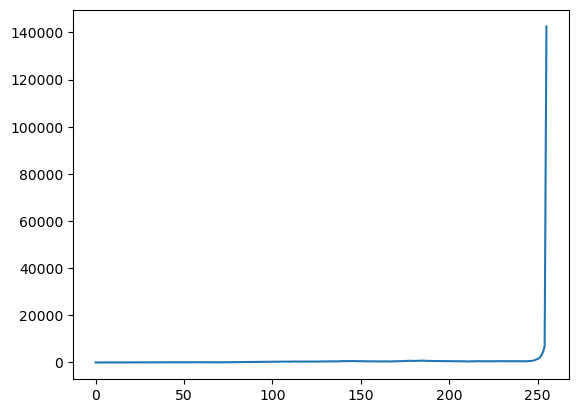

In [43]:
reference_1 = cv2.imread("refimage1.png")
reference_1 = reference_1.flatten()
hist_of_reference_1 = cv2.calcHist([reference_1],[0],None,[256],[0,256])
plt.plot(hist_of_reference_1)
plt.show()

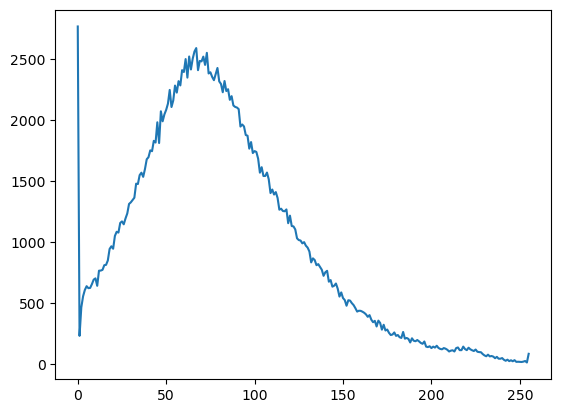

In [44]:
reference_2 = cv2.imread("refimage2.png")
reference_2 = reference_2.flatten()
hist_of_reference_2 = cv2.calcHist([reference_2],[0],None,[256],[0,256])
plt.plot(hist_of_reference_2)
plt.show()

In [45]:

d1 = np.linalg.norm(hist_of_reference_1 - hist_of_query)
d2 = np.linalg.norm(hist_of_reference_2 - hist_of_query)
print("Distance between Query image and Reference Image 1 is :",d1," and that of Query Image and Reference Image 2 is : ", d2)
print(f"Hence query image is similar to reference image 1, as its distance is smaller so is larger similarity")

Distance between Query image and Reference Image 1 is : 10869.014  and that of Query Image and Reference Image 2 is :  134073.56
Hence query image is similar to reference image 1, as its distance is smaller so is larger similarity
